<a href="https://colab.research.google.com/github/lucasbrowser/analise_covid_brasil_ml/blob/master/AnaliseCovidBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Covid 19 no Brasil
## Modelos com Python e Machine Learning para prever a Covid 19 no Brasil
Este dataset está atualizado até o data de 12/08/2020.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [5]:
#Realizando a importação do dataset
url = 'https://raw.githubusercontent.com/lucasbrowser/analise_covid_brasil_ml/master/covid_19_data.csv?raw=true'
#COnvertendo os dois campos de data na leitura do dataset
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85633,85634,2020-08-12,Zaporizhia Oblast,Ukraine,2020-08-13 04:29:15,971.0,22.0,680.0
85634,85635,2020-08-12,Zeeland,Netherlands,2020-08-13 04:29:15,950.0,69.0,0.0
85635,85636,2020-08-12,Zhejiang,Mainland China,2020-08-13 04:29:15,1275.0,1.0,1268.0
85636,85637,2020-08-12,Zhytomyr Oblast,Ukraine,2020-08-13 04:29:15,2215.0,48.0,1574.0


In [6]:
#Conferindo os tipos dos atributos
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object



Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos utilizar uma função para corrigir os nomes das colunas.


In [7]:
import re
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [8]:
df.columns = [corrige_colunas(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85633,85634,2020-08-12,Zaporizhia Oblast,Ukraine,2020-08-13 04:29:15,971.0,22.0,680.0
85634,85635,2020-08-12,Zeeland,Netherlands,2020-08-13 04:29:15,950.0,69.0,0.0
85635,85636,2020-08-12,Zhejiang,Mainland China,2020-08-13 04:29:15,1275.0,1.0,1268.0
85636,85637,2020-08-12,Zhytomyr Oblast,Ukraine,2020-08-13 04:29:15,2215.0,48.0,1574.0


##Análises

Agora vamos começar a investigar as variáveis que temos à disposição. Sabemos que trata-se de séries temporais que estão divididas por estado. Para fazer qualquer análise, portanto, precisamos dividir os nossos dados esse "grão".

Vamos verificar primeiro quantos estados temos informações para o Brasil.

In [9]:
#O método .loc faz a filtragem de uma determinada coluna, neste caso o countryregion
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85489,85490,2020-08-12,Roraima,Brazil,2020-08-13 04:29:15,37579.0,555.0,9125.0
85506,85507,2020-08-12,Santa Catarina,Brazil,2020-08-13 04:29:15,112401.0,1637.0,99781.0
85508,85509,2020-08-12,Sao Paulo,Brazil,2020-08-13 04:29:15,655181.0,25869.0,453612.0
85514,85515,2020-08-12,Sergipe,Brazil,2020-08-13 04:29:15,65865.0,1653.0,47709.0


##Casos confirmados

In [10]:
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]

In [11]:
px.line?

In [12]:
#Gráfico dos casos confirmados
px.line(brasil, 'observationdate', 'confirmed', 
        labels={'observationdate':'Data', 'confirmed':'Número de casos confirmados'},
       title='Casos confirmados no Brasil')

##Número de novos casos por dia

In [13]:
# Vamos implementar uma função para fazer a contagem de novos casos
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# Visualizando
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia',
       labels={'observationdate': 'Data', 'novoscasos': 'Novos casos'})

##Mortes

In [15]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes', mode='lines+markers',
              line=dict(color='red'))
)
#Edita o layout
fig.update_layout(title='Mortes por COVID-19 no Brasil',
                   xaxis_title='Data',
                   yaxis_title='Número de mortes')
fig.show()



##Taxa de Crescimento

Vamos calcular a taxa de crescimento do COVID desde o primeiro caso.

In [16]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [17]:
cresc_medio = taxa_crescimento(brasil, 'confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 6.13%.


Agora, vamos observar o comportamento da taxa de crescimento no tempo. Para isso, vamos definir uma função para calcular a taxa de crescimento diária.

In [18]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    n = (data_fim - data_inicio).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [19]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')
tx_dia

array([   0.        ,    0.        ,  100.        ,    0.        ,
          0.        ,    0.        ,  100.        ,    0.        ,
        225.        ,    0.        ,   53.84615385,   25.        ,
         24.        ,   22.58064516,   36.84210526,  190.38461538,
          0.        ,    7.28476821,   23.45679012,   60.5       ,
         15.88785047,   66.93548387,   27.69726248,   28.75157629,
         51.4201763 ,   24.45019405,   16.78794179,   13.66266133,
         16.87548943,   14.47236181,   14.25226807,    9.01639344,
          7.58928571,   24.8525879 ,   19.57320273,   17.67115272,
         12.58080557,   14.39929329,    7.43243243,    9.26325247,
         15.40169394,   15.22017956,   11.88620903,    8.54521335,
          5.54537122,    7.06807546,    5.57858688,    7.81903542,
         12.10513815,    7.4329096 ,   10.70501233,    8.83557983,
          5.44492335,    5.4043566 ,    5.73350023,    6.21648599,
          9.35157462,    8.00823407,    9.77184834,    6.36504

In [20]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})

##Predições

Vamos construir um modelo de séries temporais para prever os novos casos. Antes analisemos a série temporal.

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

###Decompondo a série de confirmados

In [22]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



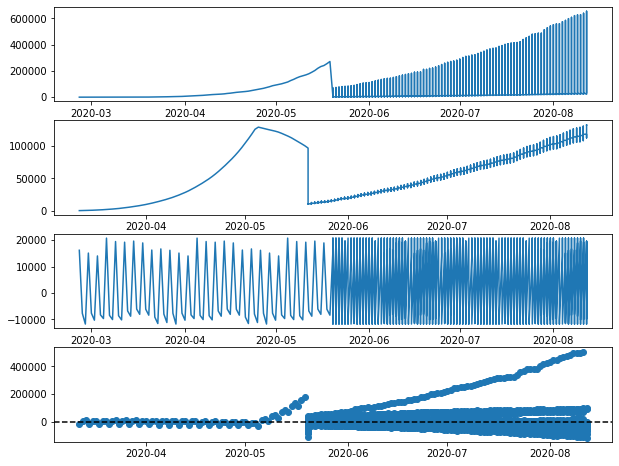

In [23]:
res2 = seasonal_decompose(confirmados, freq=30)
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed)
ax2.plot(res2.trend)
ax3.plot(res2.seasonal)
ax4.scatter(confirmados.index, res2.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()



##Predizendo o número de casos com o AUTO ARIMA

In [31]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.1MB/s 
     |████████████████████████████████| 2.1MB 27.2MB/s 
     |████████████████████████████████| 8.7MB 39.3MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [24]:
from pmdarima.arima import auto_arima

In [25]:
modelo = auto_arima(confirmados)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: User

In [26]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

In [28]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-08-13', '2020-09-12'), y=modelo.predict(30), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 30 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()



##Forecasting com Facebook Prophet

In [29]:
!pip install fbprophet

In [30]:
from fbprophet import Prophet

In [35]:
# preparando os dados
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-06-05', '2020-06-13', '2020-07-10', '2020-07-29', '2020-08-11'])

#pop = 1000000
pop = 211463256 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:1256: RuntimeWarning:

overflow encountered in exp



In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()